In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import os, sys
from matplotlib import cm

In [ ]:
data = pd.read_csv("advertising_sales_data.csv")

In [ ]:
data

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [ ]:
data.isnull().sum()

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data = data.drop(["Campaign"], axis = 1)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data)
data = imputer.transform(data)
data = pd.DataFrame({"TV":data[:,0], "Radio":data[:,1], "Newspaper":data[:,2], "Sales":data[:,3]})

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data["TV"].mean()

147.0425

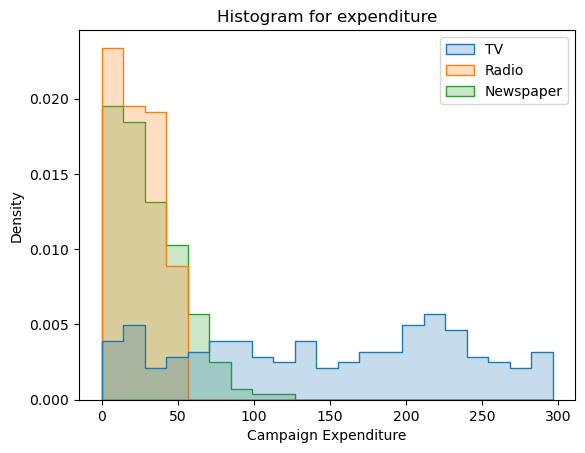

In [ ]:
sns.histplot(data=data.drop("Sales", axis = 1), element="step",
    stat="density", common_norm=False)
plt.title("Histogram for expenditure")
plt.xlabel("Campaign Expenditure")
plt.show()

[]

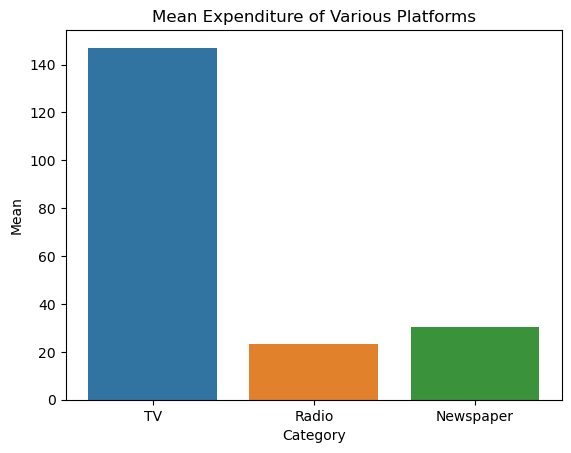

In [ ]:
meandf = pd.DataFrame({'Category': ("TV", "Radio", "Newspaper"), 'Mean':(data["TV"].mean(), data["Radio"].mean(), data["Newspaper"].mean())})
sns.barplot(data = meandf, x = "Category", y = "Mean")
plt.title("Mean Expenditure of Various Platforms")
plt.plot()

In [ ]:
meandf = pd.DataFrame({'Category': ("TV", "Radio", "Newspaper"), 'Mean':(data["TV"].mean(), data["Radio"].mean(), data["Newspaper"].mean())})
sns.barplot(data = meandf, x = "Category", y = "Mean")
plt.title("Mean Expenditure of Various Platforms")
plt.plot()

In [ ]:
print(pearsonr(data['TV'], data['Sales']))
print(pearsonr(data['Radio'], data['Sales']))
print(pearsonr(data['Newspaper'], data['Sales']))

PearsonRResult(statistic=0.9012079133023309, pvalue=7.927911625320818e-74)
PearsonRResult(statistic=0.34965074293028736, pvalue=3.876677975797356e-07)
PearsonRResult(statistic=0.15796002615492633, pvalue=0.025487444306997908)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

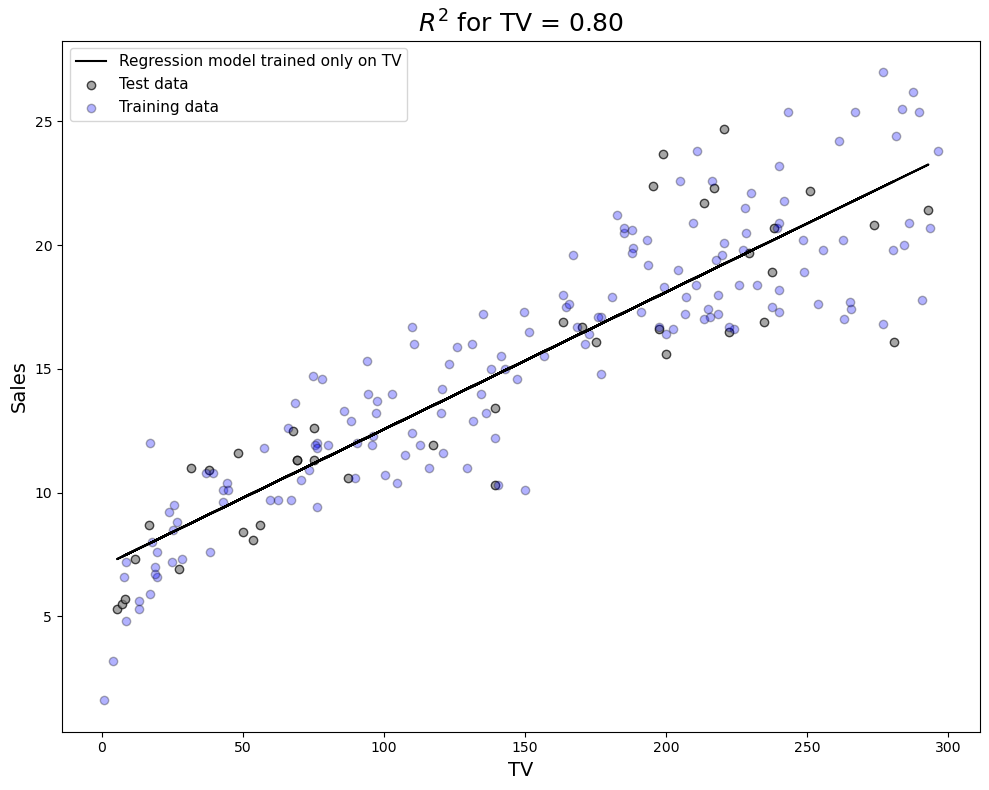

In [ ]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rtv = LinearRegression()
modeltv = rtv.fit(X_train, y_train)
predtv = modeltv.predict(X_test)

r2tv = modeltv.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(X_test, predtv, color='k', label='Regression model trained only on TV')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.scatter(X_train, y_train, edgecolor = 'k', facecolor = 'blue', alpha = 0.3, label ='Training data')
ax.set_ylabel('Sales', fontsize=14)
ax.set_xlabel('TV', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2$ for TV = %.2f' % r2tv, fontsize=18)
fig.tight_layout()

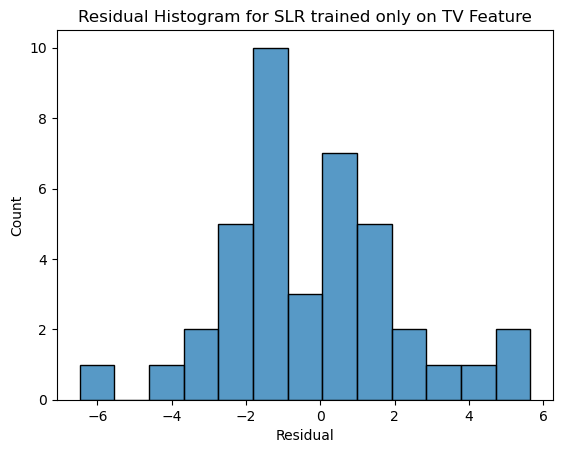

In [ ]:
residual = (y_test - predtv)
sns.histplot(residual, bins = int(len(residual)/3))
plt.title("Residual Histogram for SLR trained only on TV Feature")
plt.xlabel("Residual")
plt.show()

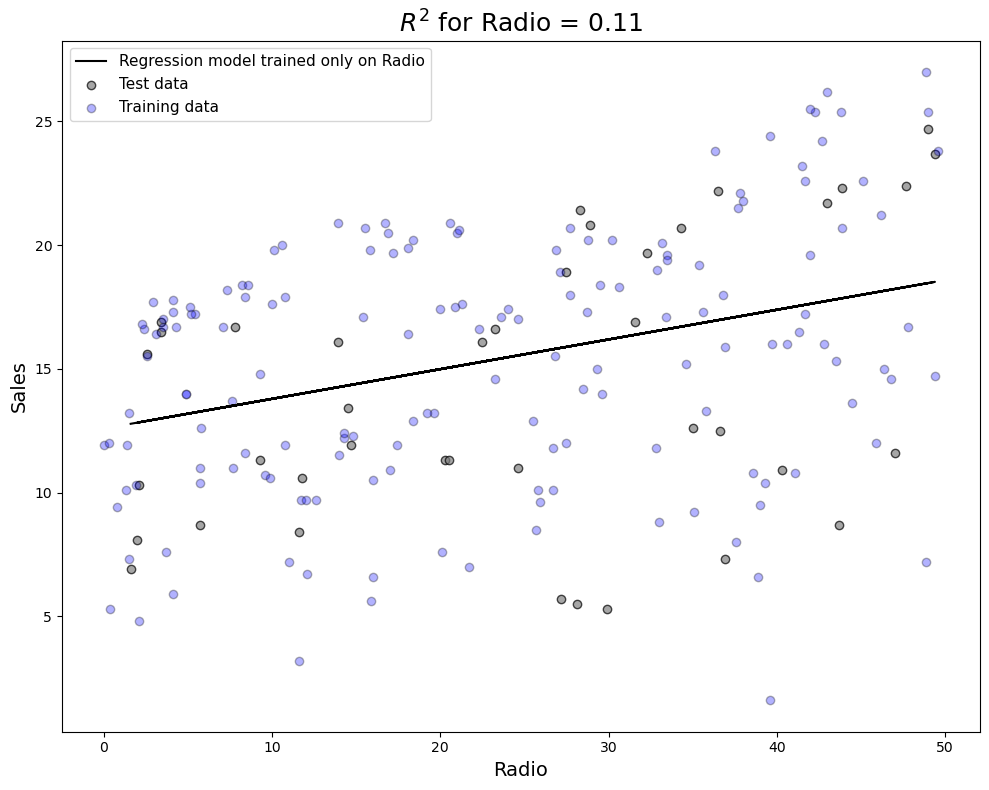

In [ ]:
X = data['Radio'].values.reshape(-1,1)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rradio = LinearRegression()
modelradio = rradio.fit(X_train, y_train)
predradio = modelradio.predict(X_test)

r2radio = modelradio.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(X_test, predradio, color='k', label='Regression model trained only on Radio')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.scatter(X_train, y_train, edgecolor = 'k', facecolor = 'blue', alpha = 0.3, label ='Training data')
ax.set_ylabel('Sales', fontsize=14)
ax.set_xlabel('Radio', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2$ for Radio = %.2f' % r2radio, fontsize=18)
fig.tight_layout()

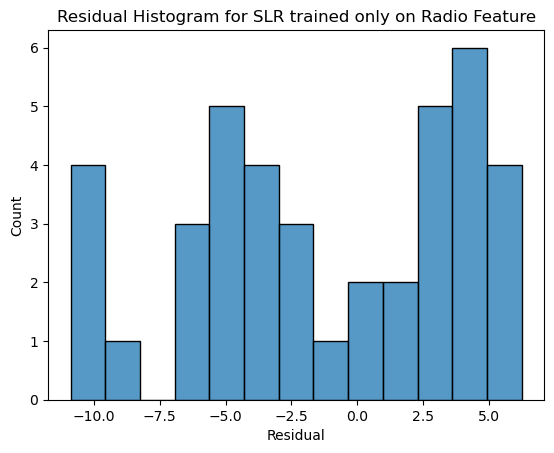

In [ ]:
residual = (y_test - predradio)
sns.histplot(residual, bins = int(len(residual)/3))
plt.title("Residual Histogram for SLR trained only on Radio Feature")
plt.xlabel("Residual")
plt.show()

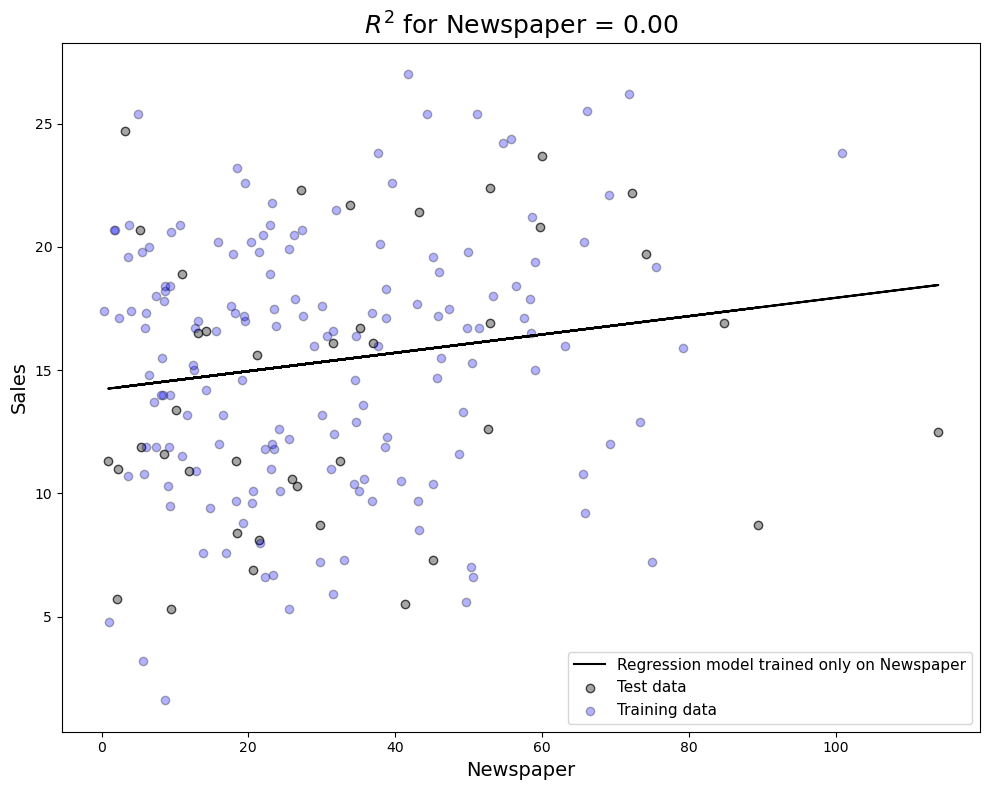

In [ ]:
X = data['Newspaper'].values.reshape(-1,1)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rNewspaper = LinearRegression()
modelNewspaper = rNewspaper.fit(X_train, y_train)
predNewspaper = modelNewspaper.predict(X_test)

r2Newspaper = modelNewspaper.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(X_test, predNewspaper, color='k', label='Regression model trained only on Newspaper')
ax.scatter(X_test, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.scatter(X_train, y_train, edgecolor = 'k', facecolor = 'blue', alpha = 0.3, label ='Training data')
ax.set_ylabel('Sales', fontsize=14)
ax.set_xlabel('Newspaper', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2$ for Newspaper = %.2f' % r2Newspaper, fontsize=18)
fig.tight_layout()

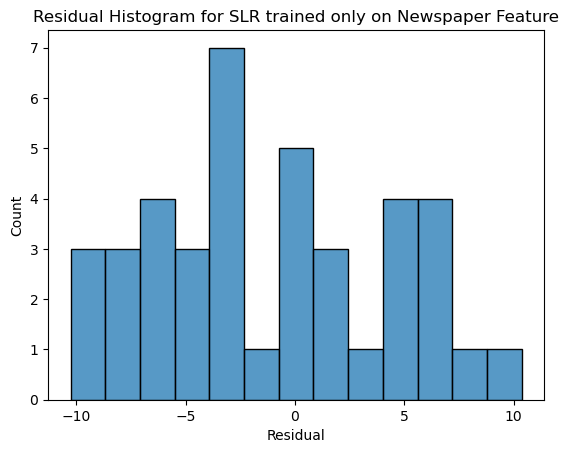

In [ ]:
residual = (y_test - predNewspaper)
sns.histplot(residual, bins = int(len(residual)/3))
plt.title("Residual Histogram for SLR trained only on Newspaper Feature")
plt.xlabel("Residual")
plt.show()

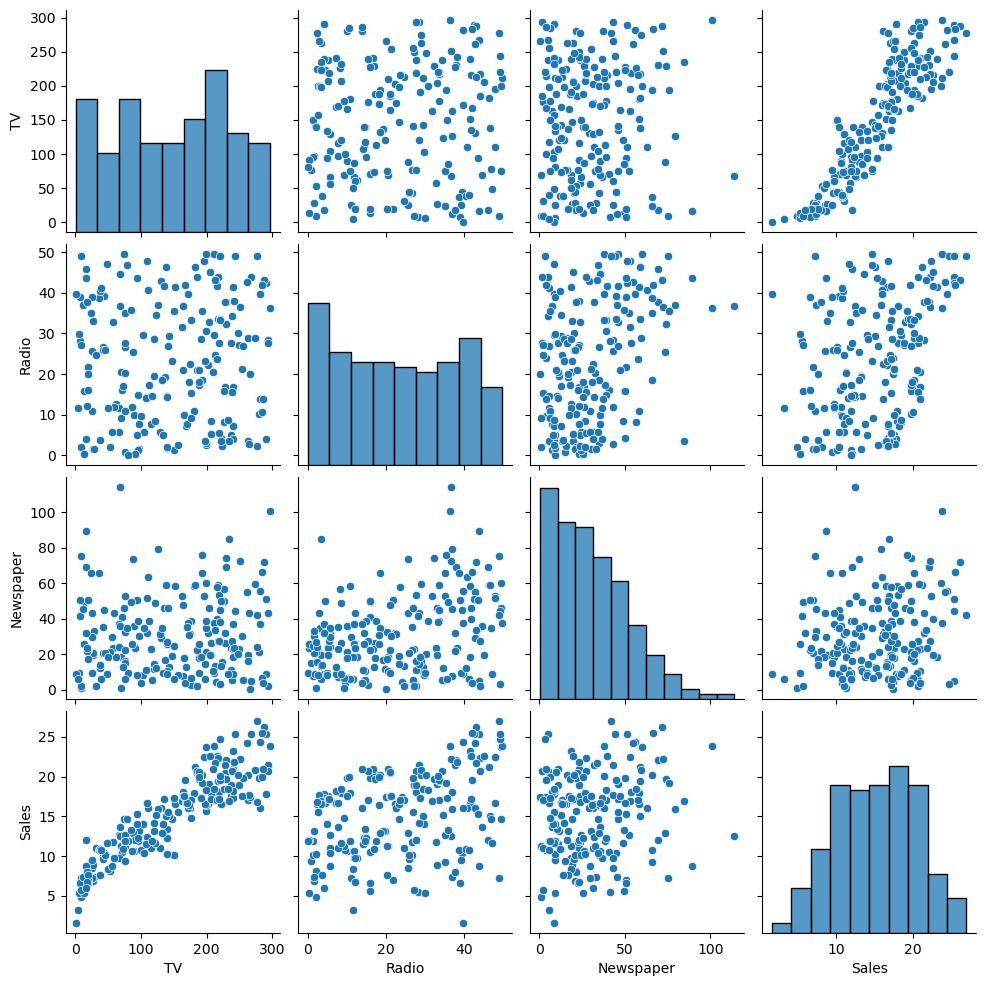

In [ ]:
sns.pairplot(data)

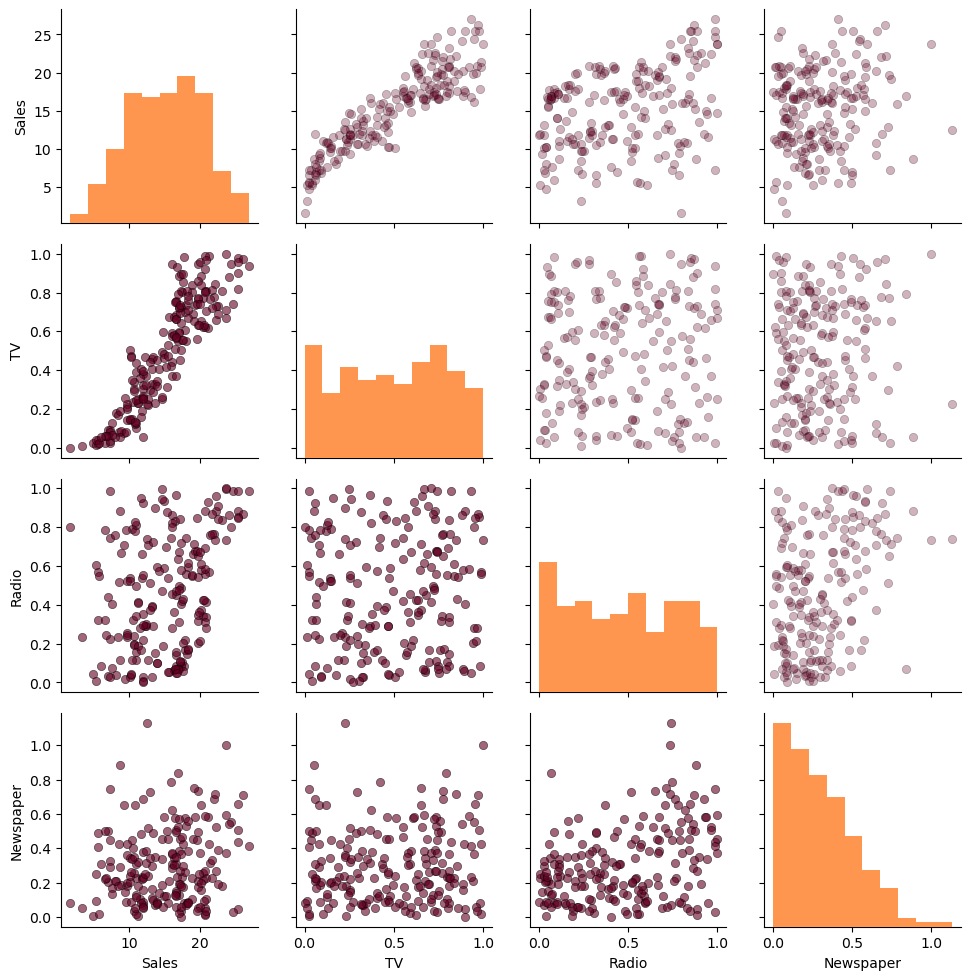

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X = sc.transform(X)

#print(X)

df = pd.DataFrame({ 'Sales':y, 'TV':X[:, 0], 'Radio':X[:, 1], 'Newspaper':X[:, 2]})
#plt.title("Pairplot of MinMax Normalized Data")
#sns.pairplot(df, corner=True, palette = sns.color_palette("muted"))

colors = iter(['xkcd:maroon', 'xkcd:maroon', 'xkcd:pastel orange'])

g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color=next(colors), edgecolor = 'k', alpha = 0.3)
g.map_lower(sns.scatterplot, color=next(colors), edgecolor = 'k', alpha = 0.6)
g.map_diag(plt.hist, color = next(colors))

plt.show()

In [ ]:
df.corr()

,Sales,TV,Radio,Newspaper
Sales,1.000000,0.901208,0.349651,0.157960
TV,0.901208,1.000000,0.054800,0.056648
Radio,0.349651,0.054800,1.000000,0.354229
Newspaper,0.157960,0.056648,0.354229,1.000000


In [ ]:
print(pearsonr(df['TV'], df['Sales']))
print(pearsonr(df['Radio'], df['Sales']))
print(pearsonr(df['Newspaper'], df['Sales']))

PearsonRResult(statistic=0.9012079133023309, pvalue=7.927911625320818e-74)
PearsonRResult(statistic=0.34965074293028736, pvalue=3.876677975797356e-07)
PearsonRResult(statistic=0.15796002615492627, pvalue=0.025487444306997908)


In [ ]:
X[:, 0]

array([0.77578627, 0.1481231 , 0.0557998 , 0.50997633, 0.60906324,
       0.02705445, 0.19208657, 0.4041258 , 0.02671627, 0.67331755,
       0.2211701 , 0.72370646, 0.07811972, 0.32735881, 0.68785932,
       0.65843761, 0.22691917, 0.94927291, 0.2316537 , 0.49577274,
       0.73621914, 0.80047345, 0.04227257, 0.76969902, 0.20831924,
       0.8867095 , 0.4808928 , 0.80960433, 0.83902604, 0.23638823,
       0.98816368, 0.37943862, 0.32634427, 0.89584038, 0.32127156,
       0.98072371, 0.90023673, 0.25025364, 0.14338857, 0.76868448,
       0.68244843, 0.59621238, 0.99053094, 0.69732837, 0.08251606,
       0.58978695, 0.30098072, 0.80892797, 0.76597903, 0.22387555,
       0.67331755, 0.33716605, 0.72945553, 0.61515049, 0.88603314,
       0.67027393, 0.02231992, 0.4582347 , 0.71051742, 0.71017924,
       0.17855935, 0.88129861, 0.80689888, 0.3449442 , 0.44098749,
       0.23097734, 0.10415962, 0.4687183 , 0.80047345, 0.73080825,
       0.67095029, 0.36895502, 0.08826513, 0.43523842, 0.71931

0.9059117026092904
MAE: 1.2747707135511093
MSE: 2.9074318865000555
RMSE: 1.7051193173793016
   Attribute  Importance
0         TV    0.054509
1      Radio    0.100967
2  Newspaper    0.004320


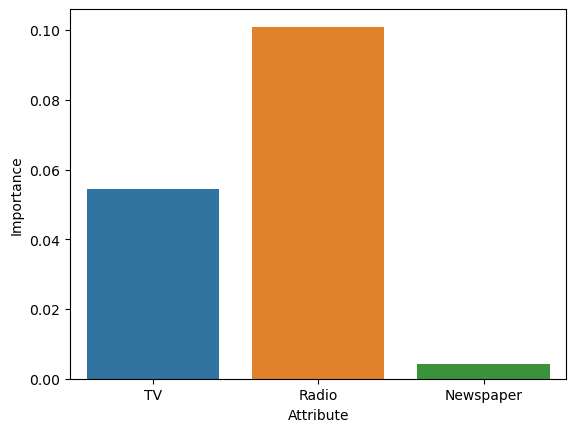

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

#importance = modelall.coef_
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

importances = pd.DataFrame(data={
    'Attribute': data[['TV', 'Radio', 'Newspaper']].columns,
    'Importance': modelall.coef_
})
print(importances)
sns.barplot(data = importances, x = "Attribute", y = "Importance")
plt.show()

0.9059117026092904
MAE: 1.2747707135511097
MSE: 2.9074318865000564
RMSE: 1.7051193173793018
Feature: 0, Score: 4.58718
Feature: 1, Score: 1.49014
Feature: 2, Score: 0.08758


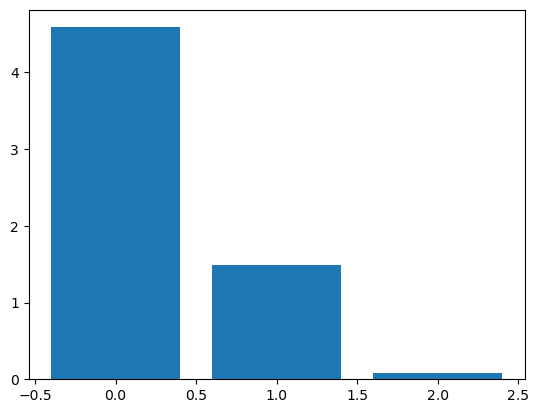

   Attribute  Importance
0         TV    4.587184
1      Radio    1.490137
2  Newspaper    0.087578


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

importance = modelall.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

importances = pd.DataFrame(data={
    'Attribute': data[['TV', 'Radio', 'Newspaper']].columns,
    'Importance': modelall.coef_
})
print(importances)

0.9059117026092903
MAE: 1.27477071355111
MSE: 2.907431886500058
RMSE: 1.7051193173793024
   Attribute  Importance
0         TV   16.118308
1      Radio    5.007952
2  Newspaper    0.434589


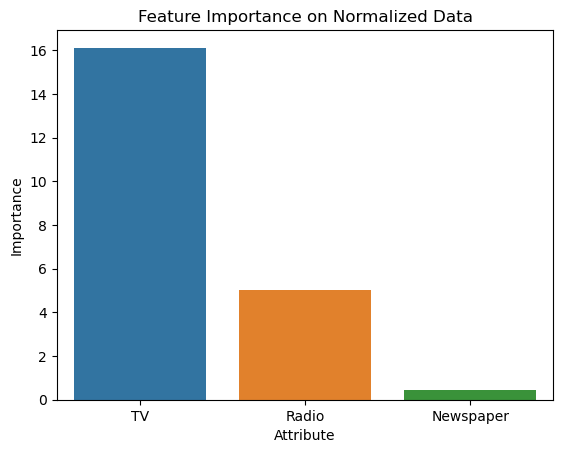

array([16.1183084 ,  5.00795236,  0.43458898])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

#importance = modelall.coef_
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

importances = pd.DataFrame(data={
    'Attribute': data[['TV', 'Radio', 'Newspaper']].columns,
    'Importance': modelall.coef_
})
print(importances)
sns.barplot(data = importances, x = "Attribute", y = "Importance")
plt.title("Feature Importance on Normalized Data")
plt.show()
modelall.coef_

In [ ]:
b1 = importance[0]
b2 = importance[1]
b3 = importance[2]

print(200*b1 + 40*b2 + 50*b3 + modelall.intercept_)

19.910501493360044


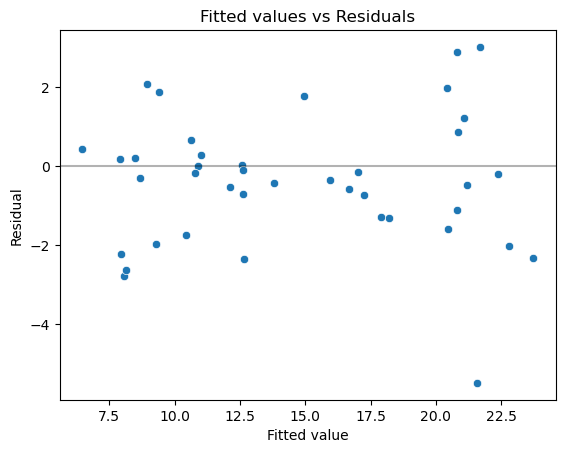

In [ ]:
sns.scatterplot(data = pd.DataFrame({"Fitted value":y_pred, "Residual":y_test-y_pred}), x = "Fitted value", y="Residual")
plt.xlabel("Fitted value")
plt.ylabel("Residual")
plt.title("Fitted values vs Residuals")
plt.axhline(y=0, color='Black', alpha = 0.3)
plt.show()

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
predall = modelall.predict([[200, 40, 50]])
predall

array([19.87104921])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#print(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

x_need = [[200, 40, 50]]
x_need = sc.transform(x_need)

y_need = modelall.predict(x_need)
print("Prediction:", y_need)

rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print(rmse)
from scipy.stats import t
print("Lower limit 95:", t.ppf(df = 200 - 3 - 1, q = 0.025, loc = y_need, scale = rmse))
print("Upper limit 95:", t.ppf(df = 200 - 3 - 1, q = 0.975, loc = y_need, scale = rmse))
print("Lower limit 90:", t.ppf(df = 200 - 3 - 1, q = 0.05, loc = y_need, scale = rmse))
print("Upper limit 90:", t.ppf(df = 200 - 3 - 1, q = 0.95, loc = y_need, scale = rmse))
print(max(X_train[:, 0]), max(X_train[:, 1]), max(X_train[:, 2]))

0.9059117026092903
Prediction: [19.87104921]
1.7051193173793024
Lower limit 95: [16.50831312]
Upper limit 95: [23.2337853]
Lower limit 90: [17.05305809]
Upper limit 90: [22.68904033]
1.0 1.0 0.9999999999999999


In [ ]:
X = data[['Radio', 'Newspaper']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

predall = modelall.predict([[40, 50]])
print(predall)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

0.10998637077378093
[17.42817174]
MAE: 4.582659422708265
MSE: 27.502400158082317
RMSE: 5.244273081951618


In [ ]:
X = data[['TV', 'Radio']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
predalladio = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

0.9078819368279503


In [ ]:
X = data[['TV']].values.reshape(-1,1)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
predalladio = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print(r2all)

0.8025613034236981


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2allnorm = modelall.score(X_test, y_test)
print(r2allnorm)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

0.9059117026092904
MAE: 1.2747707135511097
MSE: 2.9074318865000564
RMSE: 1.7051193173793018


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = data[['TV', 'Radio', 'Newspaper']].values.reshape(-1,3)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2allnorm = modelall.score(X_test, y_test)
print(r2allnorm)
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

0.9059117026092903
MAE: 1.27477071355111
MSE: 2.907431886500058
RMSE: 1.7051193173793024


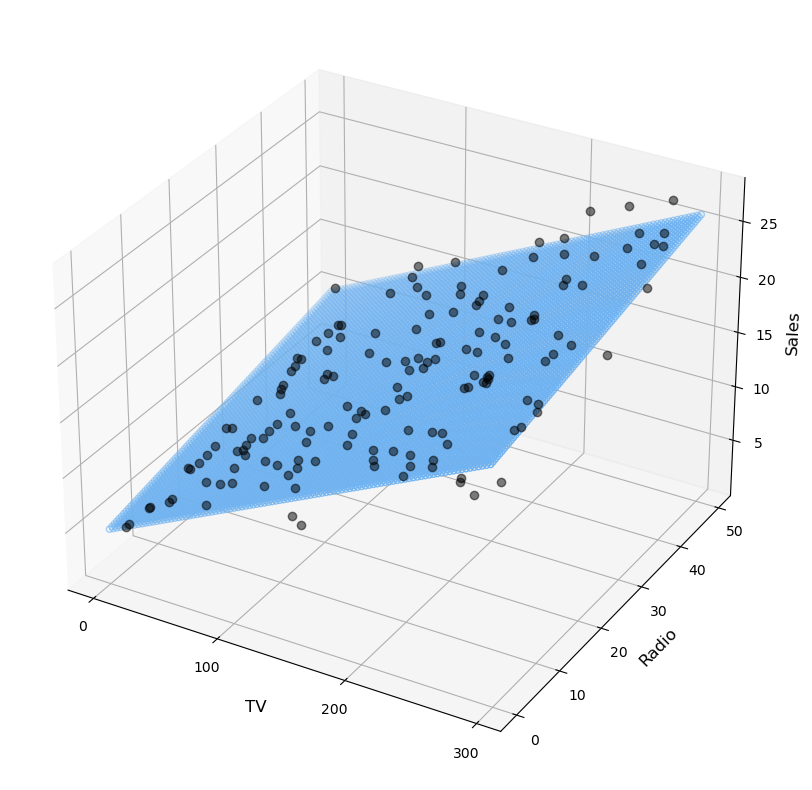

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

sc = MinMaxScaler()
X = data[['TV', 'Radio']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train_transformed, y_train)
y_pred = modelall.predict(X_test_transformed)

X_transformed = sc.transform(X)

x_pred = np.linspace(min(X[:,0]), max(X[:,0]), 100)
y_pred = np.linspace(min(X[:,1]), max(X[:,1]), 100)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

x_pred_transformed = np.linspace(min(X_transformed[:,0]), max(X_transformed[:,0]), 100)
y_pred_transformed = np.linspace(min(X_transformed[:,1]), max(X_transformed[:,1]), 100)
xx_pred_transformed, yy_pred_transformed = np.meshgrid(x_pred_transformed, y_pred_transformed)

model_viz = np.array([xx_pred_transformed.flatten(), yy_pred_transformed.flatten()]).T

predicted = modelall.predict(model_viz)

ax.plot(X_train[:, 0], X_train[:, 1], y_train, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('TV', fontsize=12)
ax.set_ylabel('Radio', fontsize=12)
ax.set_zlabel('Sales', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

plt.show()

#for ii in np.arange(0, 360, 1):
#    ax.view_init(elev=32, azim=ii)
#    fig.savefig('gif_image%d.png' % ii)

In [ ]:
import imageio
images = []
filenames = []
for ii in np.arange(0, 360, 1):
    filenames.append('gif_image%d.png' % ii)
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('tvradio.gif', images)

C:\Users\shubh\AppData\Local\Temp\ipykernel_177064\4274140680.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


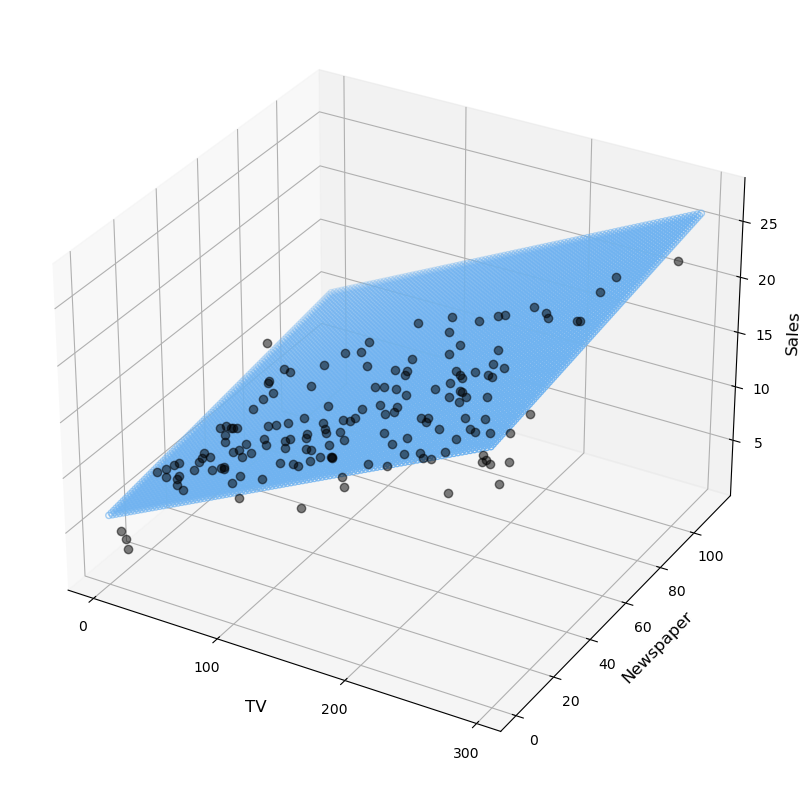

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

sc = MinMaxScaler()
X = data[['TV', 'Newspaper']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train_transformed, y_train)
y_pred = modelall.predict(X_test_transformed)

X_transformed = sc.transform(X)

x_pred = np.linspace(min(X[:,0]), max(X[:,0]), 100)
y_pred = np.linspace(min(X[:,1]), max(X[:,1]), 100)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

x_pred_transformed = np.linspace(min(X_transformed[:,0]), max(X_transformed[:,0]), 100)
y_pred_transformed = np.linspace(min(X_transformed[:,1]), max(X_transformed[:,1]), 100)
xx_pred_transformed, yy_pred_transformed = np.meshgrid(x_pred_transformed, y_pred_transformed)

model_viz = np.array([xx_pred_transformed.flatten(), yy_pred_transformed.flatten()]).T

predicted = modelall.predict(model_viz)

ax.plot(X_train[:, 0], X_train[:, 1], y_train, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('TV', fontsize=12)
ax.set_ylabel('Newspaper', fontsize=12)
ax.set_zlabel('Sales', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

plt.show()

for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

import imageio
images = []
filenames = []
#for ii in np.arange(0, 360, 1):
#    filenames.append('gif_image%d.png' % ii)
#for filename in filenames:
#    images.append(imageio.imread(filename))
#imageio.mimsave('tvnewspaper.gif', images)

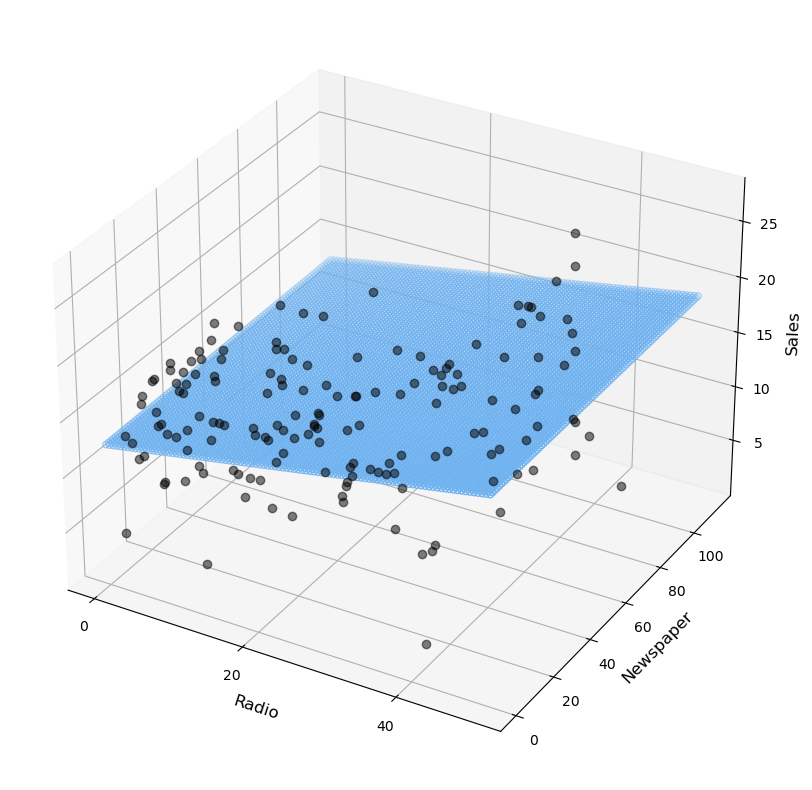

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

sc = MinMaxScaler()
X = data[['Radio', 'Newspaper']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train_transformed, y_train)
y_pred = modelall.predict(X_test_transformed)

X_transformed = sc.transform(X)

x_pred = np.linspace(min(X[:,0]), max(X[:,0]), 100)
y_pred = np.linspace(min(X[:,1]), max(X[:,1]), 100)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

x_pred_transformed = np.linspace(min(X_transformed[:,0]), max(X_transformed[:,0]), 100)
y_pred_transformed = np.linspace(min(X_transformed[:,1]), max(X_transformed[:,1]), 100)
xx_pred_transformed, yy_pred_transformed = np.meshgrid(x_pred_transformed, y_pred_transformed)

model_viz = np.array([xx_pred_transformed.flatten(), yy_pred_transformed.flatten()]).T

predicted = modelall.predict(model_viz)

ax.plot(X_train[:, 0], X_train[:, 1], y_train, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Radio', fontsize=12)
ax.set_ylabel('Newspaper', fontsize=12)
ax.set_zlabel('Sales', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

plt.show()

for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

import imageio
images = []
filenames = []
#for ii in np.arange(0, 360, 1):
#    filenames.append('gif_image%d.png' % ii)
#for filename in filenames:
#    images.append(imageio.imread(filename))
#imageio.mimsave('radionewspaper.gif', images)

In [ ]:
len(modelall.predict(model_viz))

900

In [ ]:
print(X_train[:, 0].shape)
print(X_train[:, 1].shape)
print(y_train.shape)

(160,)
(160,)
(160,)


In [ ]:
predicted

array([  16.11210417,  180.45749857,  344.80289298,  509.14828738,
        673.49368179,  837.8390762 , 1002.1844706 , 1166.52986501,
       1330.87525941, 1495.22065382, 1659.56604822, 1823.91144263,
       1988.25683703, 2152.60223144, 2316.94762585, 2481.29302025,
       2645.63841466, 2809.98380906, 2974.32920347, 3138.67459787,
       3303.01999228, 3467.36538668, 3631.71078109, 3796.05617549,
       3960.4015699 , 4124.74696431, 4289.09235871, 4453.43775312,
       4617.78314752, 4782.12854193,   24.87291104,  189.21830544,
        353.56369985,  517.90909426,  682.25448866,  846.59988307,
       1010.94527747, 1175.29067188, 1339.63606628, 1503.98146069,
       1668.32685509, 1832.6722495 , 1997.01764391, 2161.36303831,
       2325.70843272, 2490.05382712, 2654.39922153, 2818.74461593,
       2983.09001034, 3147.43540474, 3311.78079915, 3476.12619355,
       3640.47158796, 3804.81698237, 3969.16237677, 4133.50777118,
       4297.85316558, 4462.19855999, 4626.54395439, 4790.88934

In [ ]:
model_viz

array([[  0.7       ,   0.        ],
       [ 10.89655172,   0.        ],
       [ 21.09310345,   0.        ],
       ...,
       [276.00689655,  49.6       ],
       [286.20344828,  49.6       ],
       [296.4       ,  49.6       ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = data[['Radio', 'Newspaper']].values.reshape(-1,2)
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#print(X_test)

rall = LinearRegression()
modelall = rall.fit(X_train, y_train)
y_pred = modelall.predict(X_test)

r2all = modelall.score(X_test, y_test)
print("R Squared:", r2all)

x_need = [[40, 50]]
x_need = sc.transform(x_need)

y_need = modelall.predict(x_need)
print("Prediction:", y_need)

rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("RMSE: ", rmse)
from scipy.stats import t
print("Lower limit 95:", t.ppf(df = 200 - 2 - 1, q = 0.025, loc = y_need, scale = rmse))
print("Upper limit 95:", t.ppf(df = 200 - 2 - 1, q = 0.975, loc = y_need, scale = rmse))
print("Lower limit 90:", t.ppf(df = 200 - 2 - 1, q = 0.05, loc = y_need, scale = rmse))
print("Upper limit 90:", t.ppf(df = 200 - 2 - 1, q = 0.95, loc = y_need, scale = rmse))

R Squared: 0.10998637077378115
Prediction: [17.42817174]
RMSE:  5.244273081951617
Lower limit 95: [7.08605075]
Upper limit 95: [27.77029273]
Lower limit 90: [8.76135379]
Upper limit 90: [26.09498969]
